In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [2]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

In [3]:
dog1_int = read_image(str(Path('../data/input/') / 'image2.jpg'))
# dog2_int = read_image(str(Path('../data') / 'dog2.jpg'))
dog_list = [dog1_int]

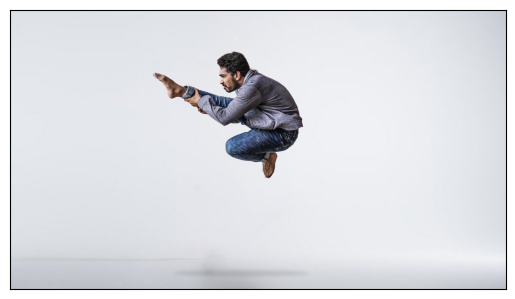

In [4]:
grid = make_grid(dog_list)
show(grid)

In [5]:
from torchvision.utils import draw_bounding_boxes

In [6]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

In [7]:
weights = FCN_ResNet50_Weights.DEFAULT
transforms = weights.transforms(resize_size=None)
model = fcn_resnet50(weights=weights, progress=False)
model = model.eval()

batch = torch.stack([transforms(d) for d in dog_list])
output = model(batch)['out']
print(output.shape, output.min().item(), output.max().item())

torch.Size([1, 21, 720, 1280]) -4.746976852416992 14.737332344055176


In [12]:
batch.size()


torch.Size([1, 3, 720, 1280])

In [8]:
sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}

normalized_masks = torch.nn.functional.softmax(output, dim=1)

# dog_and_boat_masks = [
#     normalized_masks[img_idx, sem_class_to_idx[cls]]
#     for img_idx in range(len(dog_list))
#     for cls in ('person', 'car')
# ]

# show(dog_and_boat_masks)

shape = torch.Size([1, 720, 1280]), dtype = torch.bool


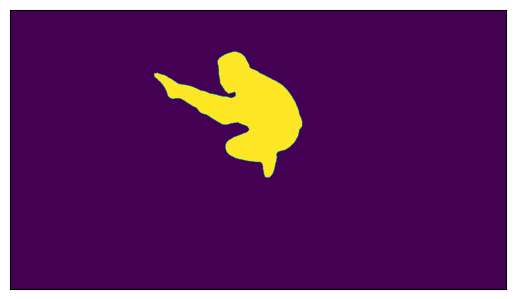

In [9]:
class_dim = 1
boolean_dog_masks = (normalized_masks.argmax(class_dim) == sem_class_to_idx['person'])
print(f"shape = {boolean_dog_masks.shape}, dtype = {boolean_dog_masks.dtype}")
show([m.float() for m in boolean_dog_masks])

In [10]:
boolean_dog_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])